# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** — ответить на следующие вопросы:
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

**Ход исследования** Данные о платежеспособности клиентов мы получим из файла data.csv. О качестве данных ничего не известно. Поэтому перед ответами на вопросы понадобится обзор данных.

Мы проверим данные на наличие пропусков, дубликатов и аномальных значений, и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных, затем лемматизируем и категоризируем данные для удобства исследования. 

Таким образом, исследование пройдёт в три этапа:

1. Обзор данных.
2. Предобработка данных.
3. Ответы на вопросы

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymystem3 import Mystem 
import numpy as np 

In [2]:
df=pd.read_csv('/datasets/data.csv') # чтение файла с данными и сохранение в df
display(df.head()) 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
display(df.tail()) 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [4]:
display(df.describe().T) 

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,2.000000e+01
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,4.017554e+05
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,7.500000e+01
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000e+00
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000e+00
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000e+00
total_income,19351.0,167422.302208,102971.566448,20667.263793,103053.152913,145017.937533,203435.067663,2.265604e+06


**Вывод**

Предварительно можно утверждать, что, данных достаточно для ответа на поставленные вопросы. Но встречаются пропуски в данных, а в некоторых столбцах встречаются аномальные значения.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Шаг 2. Предобработка данных


### Обработка пропусков

In [5]:
df.info(memory_usage='deep') # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 11.3 MB


Итак, в таблице 12 столбцов: 
* 'children' — количество детей в семье
* 'days_employed' — трудовой стаж в днях
* 'dob_years' — возраст клиента в годах
* 'education' — образование клиента
* 'education_id' — идентификатор образования
* 'family_status' — семейное положение
* 'family_status_id' — идентификатор семейного положения
* 'gender' — пол клиента
* 'income_type' — тип занятости
* 'debt' — имел ли задолженность по возврату кредитов
* 'total_income' — доход в месяц
* 'purpose' — цель получения кредита


<div>На первый взгляд, лишь стобцы children и total_income имеют пропуски.</div>
<div>Возможные причины пропущенных данных: клиенты никогда не были официально трудоустроены, или не имели официальный доход; клиенты сознательно предпочли не указывать стаж или доход; случайные пропуски.</div>

<div>Можно заметить, что в столбце dob_years имеются отрицательные значения, а также большие по величине положительные значения. Можно предположить, что часть данных является разностью первого дня работы и дня заполнения таблицы, и поэтому являются отрицательными. Другие же другие данные скорее всего введены некорректно, например, стаж указан в часах.</div>

<div>Ниже проверка данной гипотезы:</div>

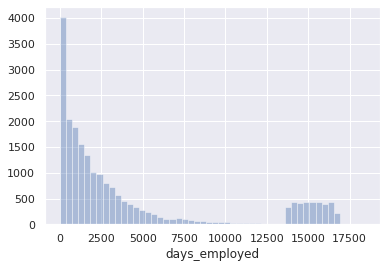

In [6]:
df_test=df.copy(deep=True) #создадим копию df для проверки гипотезы

df_test['days_employed']=df_test['days_employed'].fillna(0) #временно заполню пропуски нулями
df_test.loc[df_test['days_employed']>100000, 'days_employed'] /= 24 #деление каждого значения прревышающего определенный порог на 24
df_test['days_employed']=abs(df_test['days_employed']).astype('int') #избавляюсь от отрицательных значений и меняю тип на int
sns.set(style="darkgrid")
sns.distplot(df_test['days_employed'], kde=False) # график распределения по рабочему стажу
plt.show()

Из графика видно, что нельзя с уверенностью говорить, что данная аномалия вызвана некорректным форматом введенных данных (часы вместо дней). Для того, чтобы заполнить пропуски в столбце со стажем я буду использовать медианное значение.(Кроме того, значения данного столбца не влияют на условия поставленной задачи)

In [7]:
df['days_employed']=df['days_employed'].fillna(df['days_employed'].median()) #заполнение пропусков медианными значениями
df['total_income']=df['total_income'].fillna(df['total_income'].median()) #заполнение пропусков медианными значениями

Проверка стобца 'dob_years'

In [8]:
print(sorted(df['dob_years'].unique())) #вывод списка уникальных значений по возрастанию 

[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


В списке присутствуют строки, в которых возраст равен 0. Изменим это значение на среднее.

In [9]:
df.loc[df['dob_years'] == 0, 'dob_years'] = df['dob_years'].mean() #замена значений равных нулю на среднее в столбце
df['dob_years']=df['dob_years'].astype('int') # изменение типа данных на int
print(sorted(df['dob_years'].unique())) # проверка результата 

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


Проверка столбца 'children'

In [10]:
print(df['children'].unique())

[ 1  0  3  2 -1  4 20  5]


В столбце 'children' присутствуют аномальные значения: -1 и 20. Избавимся от знака минус, а число 20 заменим на среднее значение.


In [11]:
df['children']=abs(df['children']) #избавляемся от минусов
df.loc[df['children'] >5, 'children'] = df['children'].mean() # изменение значений превышающих 5 на среднее по столбцу
print(df['children'].unique()) # проверка

[1.         0.         3.         2.         4.         0.54327526
 5.        ]


Проверка распределения уровня доходов в столбце 'total_income':

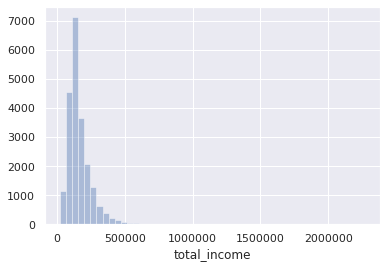

In [12]:
sns.set(style="darkgrid")
sns.distplot(df['total_income'],kde=False)
plt.show()

Проверим данные:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null float64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


**Вывод**
Предобработка обнаружила три проблемы:
* Пропуски в столбцах days_employed и total_income
* Аномальные значения в столбцах days_employed, dob_years и children 

Пропуски были исправлены, а аномальные значения были изменены только в столбце children, так как одно из условий задачи - оценка зависимости наличия детей и возврата кредита в срок.

### Замена типа данных

Для начала заменим числовые переменные:

In [14]:
df['days_employed']=abs(df['days_employed']).astype('int16') #получаю модуль целочисленных значений столбца days_employed
df['total_income']=abs(df['total_income']).astype('int32') #получаю модуль целочисленных значений столбца total_income
df['children']=df['children'].astype('int8') 
df['dob_years']=df['dob_years'].astype('int8')
df['education_id']=df['education_id'].astype('int8')
df['family_status_id']=df['family_status_id'].astype('int8')
df['debt']=df['debt'].astype('int8')
df.info(memory_usage='deep') # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int8
days_employed       21525 non-null int16
dob_years           21525 non-null int8
education           21525 non-null object
education_id        21525 non-null int8
family_status       21525 non-null object
family_status_id    21525 non-null int8
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int8
total_income        21525 non-null int32
purpose             21525 non-null object
dtypes: int16(1), int32(1), int8(5), object(5)
memory usage: 10.4 MB


Теперь изменим категориальные переменные.

In [15]:
df['family_status']=df['family_status'].astype('category')
df['income_type']=df['income_type'].astype('category')


df.info(memory_usage='deep') # проверка


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int8
days_employed       21525 non-null int16
dob_years           21525 non-null int8
education           21525 non-null object
education_id        21525 non-null int8
family_status       21525 non-null category
family_status_id    21525 non-null int8
gender              21525 non-null object
income_type         21525 non-null category
debt                21525 non-null int8
total_income        21525 non-null int32
purpose             21525 non-null object
dtypes: category(2), int16(1), int32(1), int8(5), object(3)
memory usage: 6.0 MB


**Вывод**

Изменен вещественный вид исследуемых данных на целочисленный. Нам удалось уменьшить размер датафрейма с 11.3 Mb до 6.0 Mb. После обработки дубликатов снова воспользуюсь методом замены типа категориальных переменных.

### Обработка дубликатов

Посмотрим, есть ли дубликаты в столбцах education, family_status и income_type

In [16]:
print(df['education'].unique())
print(df['family_status'].unique())
print(df['income_type'].unique())


['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
[женат / замужем, гражданский брак, вдовец / вдова, в разводе, Не женат / не замужем]
Categories (5, object): [женат / замужем, гражданский брак, вдовец / вдова, в разводе, Не женат / не замужем]
[сотрудник, пенсионер, компаньон, госслужащий, безработный, предприниматель, студент, в декрете]
Categories (8, object): [сотрудник, пенсионер, компаньон, госслужащий, безработный, предприниматель, студент, в декрете]


<div> Видим дубликаты в стобце education
    </div>

In [17]:
df['education']=df['education'].str.lower() #изменим тип регистра значений на нижний
df['education']=df['education'].astype('category')
print(df['education'].value_counts()) #повторная проверка на пропуски

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


Проверим получившийся датафрейм

In [18]:
df.info(memory_usage='deep') # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int8
days_employed       21525 non-null int16
dob_years           21525 non-null int8
education           21525 non-null category
education_id        21525 non-null int8
family_status       21525 non-null category
family_status_id    21525 non-null int8
gender              21525 non-null object
income_type         21525 non-null category
debt                21525 non-null int8
total_income        21525 non-null int32
purpose             21525 non-null object
dtypes: category(3), int16(1), int32(1), int8(5), object(2)
memory usage: 4.1 MB


### Лемматизация

In [19]:
m = Mystem()
df.loc[:,'purpose'] = df.loc[:,'purpose'].map(lambda x: m.lemmatize(x)) # применим функцию лемматизации строки в каждой ячейке столбка purpose
display(df.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,"[покупка, , жилье, \n]"
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,"[приобретение, , автомобиль, \n]"
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,"[покупка, , жилье, \n]"
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,"[дополнительный, , образование, \n]"
4,0,12586,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,"[сыграть, , свадьба, \n]"


In [20]:
np.unique(df['purpose'].sum()) 

array(['\n', ' ', 'автомобиль', 'высокий', 'для', 'дополнительный',
       'жилой', 'жилье', 'заниматься', 'коммерческий', 'на',
       'недвижимость', 'образование', 'операция', 'подержанный',
       'подержать', 'покупка', 'получение', 'приобретение', 'проведение',
       'профильный', 'ремонт', 'с', 'свадьба', 'свой', 'сдача', 'сделка',
       'семья', 'со', 'собственный', 'строительство', 'сыграть'],
      dtype='<U14')

Основные категории: автомобиль, квартра, строительство и ремонт, образование, свадьба 

In [21]:
category=['автомобиль','жилье','квартира','свадьба','образование','ремонт','строительство','недвижимость']
def purpose(item):
    '''Функция возвращает список с названием категории при совпадении одного элемента списка ячейки из проверочного списка'''
    purpose_sorted = [x for x in item if x in item and x in category]
    return purpose_sorted
# Применим функцию purpose к каждому элементу столбца purpose, которая возвращает список с названием категории, и перезапишем
# в ячейку название категории в виде строки
df.loc[:,'purpose'] = df.loc[:,'purpose'].map(lambda item: purpose(item)).map(lambda item:','.join(item)) 
df['purpose']=df['purpose'].astype('category')
print(df['purpose'].value_counts()) #проверка результата    

недвижимость                  4486
автомобиль                    4315
образование                   4022
жилье                         3861
свадьба                       2348
строительство,недвижимость    1881
ремонт,жилье                   612
Name: purpose, dtype: int64


**Вывод**

Обработав пропуски методом изменения регистров, и приведя все значения в стобце purpose к основным категориям, можем приступить к следующему пункту задания.

### Категоризация данных

Для того, чтобы ответить на первый вопрос, необходимо категиризировать данные о детях. Можно ввести следующие категории: бездетные, один или два ребенка и более трех детей.

In [22]:
def children_group(children):

    
    if children in range(0,1):
        return 'Нет детей'
    if children in range(1,3):
        return '1 или 2 ребенка'
    if children>=3:
        return 'более трёх детей'

df['children_group']=df['children'].apply(children_group)
df['children_group']=df['children_group'].astype('category')
df['children_group'].head()

0     1 или 2 ребенка
1     1 или 2 ребенка
2           Нет детей
3    более трёх детей
4           Нет детей
Name: children_group, dtype: category
Categories (3, object): [1 или 2 ребенка, Нет детей, более трёх детей]

Для ответа на третий вопрос, я решил выделить 4 категории в стобце total_income:

In [23]:
def income_group(income):

    
    if income in range(0,50000):
        return 'доход менее 50 тыс.руб'
    if income in range(50000,100000):
        return 'доход 50-100 тыс.руб'
    if income in range(100000,150000):
        return 'доход 100-150 тыс.руб'
    if income>150000:
        return 'доход более 150 тыс.руб'
    

df['total_income_group']=df['total_income'].apply(income_group)
df['total_income_group']=df['total_income_group'].astype('category')
df['total_income_group'].head()

0    доход более 150 тыс.руб
1      доход 100-150 тыс.руб
2      доход 100-150 тыс.руб
3    доход более 150 тыс.руб
4    доход более 150 тыс.руб
Name: total_income_group, dtype: category
Categories (4, object): [доход 100-150 тыс.руб, доход 50-100 тыс.руб, доход более 150 тыс.руб, доход менее 50 тыс.руб]

Посмотрим как выглядят свойства финального датафрейма

In [24]:
df.info(memory_usage='deep') # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 14 columns):
children              21525 non-null int8
days_employed         21525 non-null int16
dob_years             21525 non-null int8
education             21525 non-null category
education_id          21525 non-null int8
family_status         21525 non-null category
family_status_id      21525 non-null int8
gender                21525 non-null object
income_type           21525 non-null category
debt                  21525 non-null int8
total_income          21525 non-null int32
purpose               21525 non-null category
children_group        21525 non-null category
total_income_group    21525 non-null category
dtypes: category(6), int16(1), int32(1), int8(5), object(1)
memory usage: 1.5 MB


**Вывод**

Для решения задачи были категоризированны данные из столбцов children и total_income. Иммея категоризированные данные, я могу вычислить для каждой категории абсолютное и относительное число просрочек по кредитам, что позволит ответить на поставленные вопросы.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [25]:
df.groupby('children_group')['debt'].count() # численность в каждой категории

children_group
1 или 2 ребенка      6920
Нет детей           14225
более трёх детей      380
Name: debt, dtype: int64

In [26]:
df.groupby('children_group')['debt'].sum() # число просрочек по каждой категории

children_group
1 или 2 ребенка      639.0
Нет детей           1071.0
более трёх детей      31.0
Name: debt, dtype: float64

In [27]:
#вычислим процент просрочек по каждой категории - отношение общей численности группы к числу просрочек в данной категории 
df.groupby('children_group')['debt'].count()/df.groupby('children_group')['debt'].sum() 

children_group
1 или 2 ребенка     10.829421
Нет детей           13.281979
более трёх детей    12.258065
Name: debt, dtype: float64

**Вывод**

Среди клиентов без детей процент по просрочкам оказался выше на 2,5%, чем у клиентов банка имеющих 1-2 детей, и на 1,5% больше, чем у клиентов имеющих более 3 детей.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [28]:
df.groupby('family_status')['debt'].count()/df.groupby('family_status')['debt'].sum()

family_status
Не женат / не замужем    10.266423
в разводе                14.058824
вдовец / вдова           15.238095
гражданский брак         10.765464
женат / замужем          13.297530
Name: debt, dtype: float64

**Вывод**

Чаще всего проблемы с возвратом кредита испытывают вдовцы/вдовы. Реже всего просрочки по кредитам наблюдаются в категориях не женат/не замужем, и гражданский брак

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [29]:
df.groupby('total_income_group')['debt'].count()

total_income_group
доход 100-150 тыс.руб      7878
доход 50-100 тыс.руб       4091
доход более 150 тыс.руб    9184
доход менее 50 тыс.руб      372
Name: debt, dtype: int64

In [30]:
#вычислим процент просрочек по каждой категории - отношение общей численности группы к числу просрочек в данной категории 
df.groupby('total_income_group')['debt'].count()/df.groupby('total_income_group')['debt'].sum()

total_income_group
доход 100-150 тыс.руб      11.918306
доход 50-100 тыс.руб       12.359517
доход более 150 тыс.руб    12.650138
доход менее 50 тыс.руб     16.173913
Name: debt, dtype: float64

**Вывод**

В категории с наименьшим доходом наблюдается наибольший процент просрочек

- Как разные цели кредита влияют на его возврат в срок?

In [31]:
df.groupby('purpose')['debt'].count()

purpose
автомобиль                    4315
жилье                         3861
недвижимость                  4486
образование                   4022
ремонт,жилье                   612
свадьба                       2348
строительство,недвижимость    1881
Name: debt, dtype: int64

In [32]:
df.groupby('purpose')['debt'].sum()

purpose
автомобиль                    403.0
жилье                         273.0
недвижимость                  330.0
образование                   370.0
ремонт,жилье                   35.0
свадьба                       186.0
строительство,недвижимость    144.0
Name: debt, dtype: float64

In [33]:
#вычислим процент просрочек по каждой категории - отношение общей численности группы к числу просрочек в данной категории
df.groupby('purpose')['debt'].count()/df.groupby('purpose')['debt'].sum()

purpose
автомобиль                    10.707196
жилье                         14.142857
недвижимость                  13.593939
образование                   10.870270
ремонт,жилье                  17.485714
свадьба                       12.623656
строительство,недвижимость    13.062500
Name: debt, dtype: float64

**Вывод**

Больше всего просрочек наблюдается в категории ремонт жилья, на втором месте приобретение жилья и недвижимости. Наименьший процент просрочек наблюдается в категориях покупка автомобилья и образование. 

## Шаг 4. Общий вывод

Мы ответили на четыре вопроса и выяснили:
1. Среди клиентов без детей процент по просрочкам оказался выше на 2,5%, чем у клиентов банка имеющих 1-2 детей, и на 1,5% больше, чем у клиентов имеющих более 3 детей.
2. Холостые клиенты, или состоящие в гражданском браке имеют просрочек на 5% меньше чем клиенты из категории вдовцы/вдовы.
3. В категории с доходом менее 50 тыс.руб наблюдается большее число просрочек, по отношению к другим категориям.
4. Клиенты взявшие кредит на образование выплачивают кредит гораздо охотнее чем те, кто взял кредит на ремонт жилья - 10% просрочек против 17%.
